In [36]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(15, 8))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)


### Tổng quan về giá của Bitcoin từ 17-9-2024 đến 8-12-2022

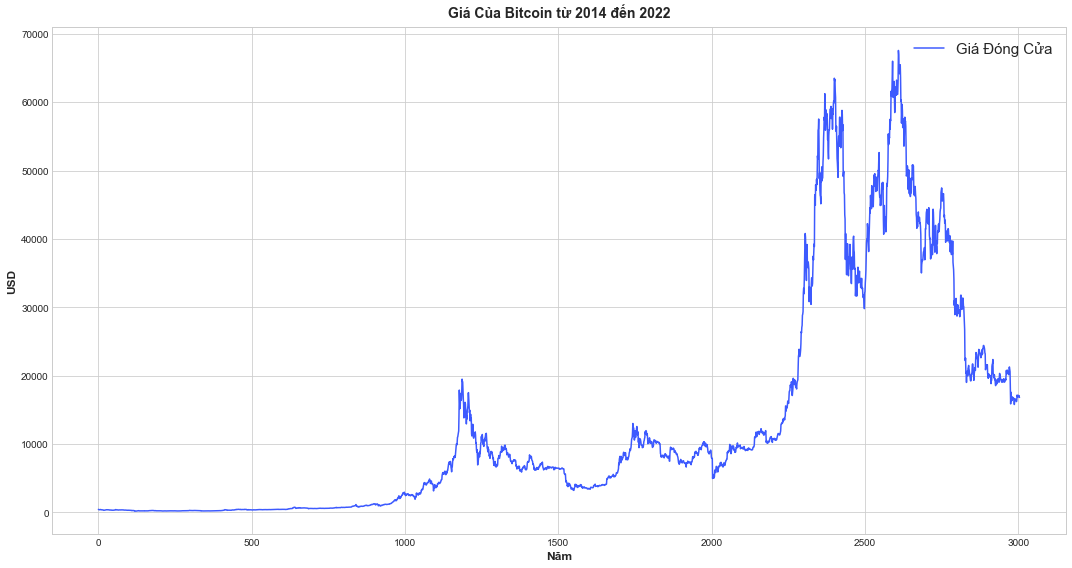

In [37]:
df = pd.read_csv('./data/bitcoin-price-17_9_14-8_12_22.csv')
df[['Date','Adj Close']].plot(color='#3d5afe')
plt.title("Giá Của Bitcoin từ 2014 đến 2022")
plt.xlabel("Năm")
plt.ylabel("USD")
plt.legend(['Giá Đóng Cửa'],fontsize=15)
plt.show()

### Xóa các trường không cần thiết

In [38]:
df = df[['Date','Adj Close']]
df.rename(columns={ 'Adj Close': 'price' },inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

### Chia dự liệu thành 3 kịch bản cụ thể như sau
| Kịch bản | Tập Train | Tập Test |
|---------|----------|----------|
| 1 | 17-9-2014 tới 1-10-2022 (2937 data)  | 2-10-2022 tới 8-10-2022 |
| 2 | 17-10-2014 tới 1-11-2022 | 2-11-2022 tới 8-11-2022 |
| 3 | 17-11-2014 tới 1-12-2022 | 2-12-2022 tới 8-12-2022 |


#### Scenario 1

In [39]:
scenario_1_train = df[df.Date.between('2014-09-17', '2022-10-1')]
scenario_1_test = df[df.Date.between('2022-10-2', '2022-10-8')]

scenario_1_train.to_csv('./data/scenario_1/train.csv')
scenario_1_test.to_csv('./data/scenario_1/test.csv')

#### Scenario 2

In [40]:
scenario_2_train = df[df.Date.between('2014-10-17', '2022-11-1')]
scenario_2_test = df[df.Date.between('2022-11-2', '2022-11-8')]

scenario_2_train.to_csv('./data/scenario_2/train.csv')
scenario_2_test.to_csv('./data/scenario_2/test.csv')

#### Scenario 3

In [41]:
scenario_3_train = df[df.Date.between('2014-11-17', '2022-12-1')]
scenario_3_test = df[df.Date.between('2022-12-2', '2022-12-8')]

scenario_3_train.to_csv('./data/scenario_3/train.csv')
scenario_3_test.to_csv('./data/scenario_3/test.csv')